In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [364]:
raw_data = pandas.read_excel("Result_+150mA_16394.xlsx")
origin_data = raw_data[14:16398].values
data = origin_data[:,15:20]
x = np.array(range(16384))

In [365]:
data_Q = data[:, 1]  # 此处可以做修改
data_C = data[:, 2]
config = data[:, 4]

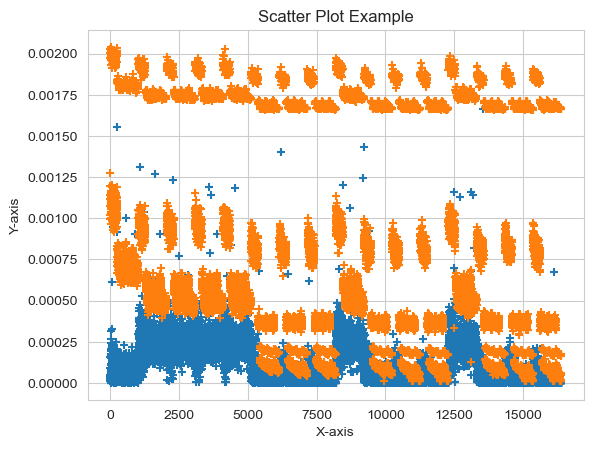

In [366]:
# 绘制散点图
# fig = plt.figure()
# fig.set_size_inches(4, 10)
# fig.set_dpi(400)
plt.scatter(x, data[:, 0], marker='+', label='deta_mean')
plt.scatter(x, data[:, 1], marker='+', label='std')
# plt.scatter(x, data_C, marker='+', label='cost')
# plt.scatter(x, data[:, 3], marker='+', label='-log(deta_mean)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
# plt.ylim(0, 0.001)
plt.title('Scatter Plot Example')
# plt.legend()
plt.show()

C:\Users\yangr\AppData\Local\Temp\ipykernel_18788\1353450955.py:9: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(data[:, 0]), -np.log(data[:, 1]), color='#C2E11F', marker='+', label='log(deta_mean-std)')


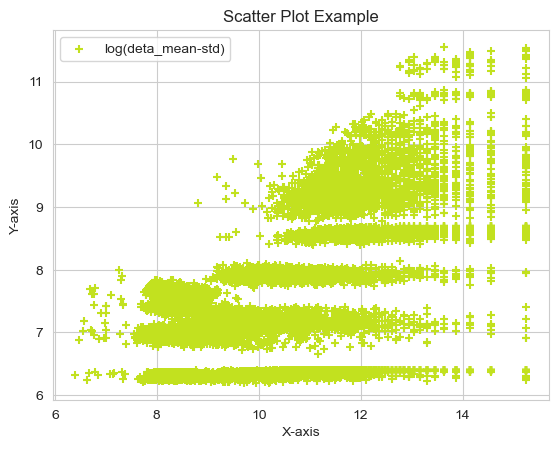

In [367]:
# 绘制散点图
fig = plt.figure()
# fig.set_size_inches(5, 5)
# fig.set_dpi(600)
# plt.scatter(data[:, 0], data[:, 2], color='#3C1F8F', marker='+', label='deta_mean-cost')
# plt.scatter(data[:, 1], data[:, 2], color='#2A7A8A', marker='+', label='std-cost')
# plt.scatter(data[:, 3], data[:, 2], color='#6B5B3F', marker='+', label='-log(deta_mean)-cost')
# plt.scatter(data[:, 0], data[:, 1], color='#C2E11F', marker='+', label='deta_mean-std')
plt.scatter(-np.log(data[:, 0]), -np.log(data[:, 1]), color='#C2E11F', marker='+', label='log(deta_mean-std)')
# plt.scatter(x, data_C, marker='+', label='cost')
# plt.scatter(x, data[:, 3], marker='+', label='-log(deta_mean)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
# plt.ylim(0, 0.001)
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

In [57]:
def global_search(a, x, y, x_max):
    v = min(a[:, y][a[:, x] <= x_max])
    con = a[:, -1][a[:, y] == v]
    return v, con

In [59]:
global_search(data, 1, 2, 0.0001) #规定允许的X，返回全局最小Y和对应输入

(395.07,
 array([1111123., 1111132., 1111213., 1111231., 1111312., 1111321.,
        3332114., 3332141., 3332411.]))

In [60]:
np.where(data[:, 4] == float("1312444"))

(array([2175], dtype=int64),)

In [104]:
# 模拟退火算法 程序：惩罚函数法求解线性规划问题

import math                         # 导入模块
import random                       # 导入模块
import pandas as pd                 # 导入模块 YouCans, XUPT
import numpy as np                  # 导入模块 numpy，并简写成 np
import matplotlib.pyplot as plt
from datetime import datetime

def cal_Energy(inputs, nVar, mk): 	# m(k)：惩罚因子，随迭代次数 k 逐渐增大
    global count
    global limit
    global mode
    if mode == "best cost":
        count += 1
        string = ""
        for i in inputs:
            string += str(int(i))
        indices = np.where(config == float(string))[0][0]
        if  data_Q[indices] > limit:
            return 1000
        else:
            cost = data_C[indices]
            return cost
    elif mode == "best percent":
        count += 1
        string = ""
        for i in inputs:
            string += str(int(i))
        indices = np.where(config == float(string))[0][0]
        if  data_C[indices] > limit:
            return 1000
        else:
            percent = data_Q[indices]
            return percent

# 子程序：模拟退火算法的参数设置
def ParameterSetting():
    cName = "funcOpt"           # 定义问题名称 YouCans, XUPT
    nVar = 7                    # 给定自变量数量，y=f(x1,..xn)
    xMin = [1, 1, 1, 1, 1, 1, 1]               # 给定搜索空间的下限，x1_min,..xn_min
    xMax = [4, 4, 4, 4, 4, 4, 4]              # 给定搜索空间的上限，x1_max,..xn_max

    tInitial = 10            # 设定初始退火温度(initial temperature)
    tFinal  = 1               # 设定终止退火温度(stop temperature)
    alfa    = 0.97            # 设定降温参数，T(k)=alfa*T(k-1)
    meanMarkov = 5            # Markov链长度，也即内循环运行次数
    scale   = 1               # 定义搜索步长，可以设为固定值或逐渐缩小
    return cName, nVar, xMin, xMax, tInitial, tFinal, alfa, meanMarkov, scale

# 模拟退火算法
def OptimizationSSA(nVar,xMin,xMax,tInitial,tFinal,alfa,meanMarkov,scale):
    # ====== 初始化随机数发生器 ======
    randseed = random.randint(1, 1000)
    random.seed(randseed)  # 随机数发生器设置种子，也可以设为指定整数

    # ====== 随机产生优化问题的初始解 ======
    xInitial = np.zeros((nVar))   # 初始化，创建数组
    for v in range(nVar):
        # random.uniform(min,max) 在 [min,max] 范围内随机生成一个整数
        xInitial[v] = random.randint(xMin[v], xMax[v])
    # 调用子函数 cal_Energy 计算当前解的目标函数值
    fxInitial = cal_Energy(xInitial, nVar, 1) # m(k)：惩罚因子，初值为 1

    # ====== 模拟退火算法初始化 ======
    xNew = np.zeros((nVar))         # 初始化，创建数组
    xNow = np.zeros((nVar))         # 初始化，创建数组
    xBest = np.zeros((nVar))        # 初始化，创建数组
    xNow[:]  = xInitial[:]          # 初始化当前解，将初始解置为当前解
    xBest[:] = xInitial[:]          # 初始化最优解，将当前解置为最优解
    fxNow  = fxInitial              # 将初始解的目标函数置为当前值
    fxBest = fxInitial              # 将当前解的目标函数置为最优值
    # print('x_Initial:{:.6f},{:.6f},\tf(x_Initial):{:.6f}'.format(xInitial[0], xInitial[1], fxInitial))

    recordIter = []                 # 初始化，外循环次数
    recordFxNow = []                # 初始化，当前解的目标函数值
    recordFxBest = []               # 初始化，最佳解的目标函数值
    recordPBad = []                 # 初始化，劣质解的接受概率
    kIter = 0                       # 外循环迭代次数，温度状态数
    totalMar = 0                    # 总计 Markov 链长度
    totalImprove = 0                # fxBest 改善次数
    nMarkov = meanMarkov            # 固定长度 Markov链

    # ====== 开始模拟退火优化 ======
    # 外循环，直到当前温度达到终止温度时结束
    tNow = tInitial                 # 初始化当前温度(current temperature)
    while tNow >= tFinal:           # 外循环，直到当前温度达到终止温度时结束
        # 在当前温度下，进行充分次数(nMarkov)的状态转移以达到热平衡
        kBetter = 0                 # 获得优质解的次数
        kBadAccept = 0              # 接受劣质解的次数
        kBadRefuse = 0              # 拒绝劣质解的次数

        # ---内循环，循环次数为Markov链长度
        for k in range(nMarkov):    # 内循环，循环次数为Markov链长度
            totalMar += 1           # 总 Markov链长度计数器

            # ---产生新解
            # 产生新解：通过在当前解附近随机扰动而产生新解，新解必须在 [min,max] 范围内
            # 方案 1：只对 n元变量中的一个进行扰动，其它 n-1个变量保持不变
            xNew[:] = xNow[:]
            v = random.randint(0, nVar-1)   # 产生 [0,nVar-1]之间的随机数
            xNew[v] = xNow[v] + scale * (xMax[v]-xMin[v]) * random.normalvariate(0, 1)
            # random.normalvariate(0, 1)：产生服从均值为0、标准差为 1 的正态分布随机实数
            xNew[v] = max(min(xNew[v], xMax[v]), xMin[v])  # 保证新解在 [min, max] 范围内

            # ---计算目标函数和能量差
            # 调用子函数 cal_Energy 计算新解的目标函数值
            fxNew = cal_Energy(xNew, nVar, kIter)
            deltaE = fxNew - fxNow

            # ---按 Metropolis 准则接受新解
            # 接受判别：按照 Metropolis 准则决定是否接受新解
            if fxNew < fxNow:  # 更优解：如果新解的目标函数好于当前解，则接受新解
                accept = True
                kBetter += 1
            else:  # 容忍解：如果新解的目标函数比当前解差，则以一定概率接受新解
                pAccept = math.exp(-deltaE / tNow)  # 计算容忍解的状态迁移概率
                if pAccept > random.random():
                    accept = True  # 接受劣质解
                    kBadAccept += 1
                else:
                    accept = False  # 拒绝劣质解
                    kBadRefuse += 1

            # 保存新解
            if accept == True:  # 如果接受新解，则将新解保存为当前解
                xNow[:] = xNew[:]
                fxNow = fxNew
                if fxNew < fxBest:  # 如果新解的目标函数好于最优解，则将新解保存为最优解
                    fxBest = fxNew
                    xBest[:] = xNew[:]
                    totalImprove += 1
                    scale = scale*0.99  # 可变搜索步长，逐步减小搜索范围，提高搜索精度

        # ---内循环结束后的数据整理
        # 完成当前温度的搜索，保存数据和输出
        pBadAccept = kBadAccept / (kBadAccept + kBadRefuse)  # 劣质解的接受概率
        recordIter.append(kIter)  # 当前外循环次数
        recordFxNow.append(round(fxNow, 5))  # 当前解的目标函数值
        recordFxBest.append(round(fxBest, 5))  # 最佳解的目标函数值
        recordPBad.append(round(pBadAccept, 5))  # 最佳解的目标函数值

        if kIter%10 == 0:                           # 模运算，商的余数
            # print('i:{},t(i):{:.2f}, badAccept:{:.6f}, f(x)_best:{:.6f}'.\
            #     format(kIter, tNow, pBadAccept, fxBest))
            xBest = np.round(xBest)
            # print(xBest)

        # 缓慢降温至新的温度，降温曲线：T(k)=alfa*T(k-1)
        tNow = tNow * alfa
        kIter = kIter + 1
        fxBest = cal_Energy(xBest, nVar, kIter)  # 由于迭代后惩罚因子增大，需随之重构增广目标函数
        xBest = np.round(xBest)
        # ====== 结束模拟退火过程 ======
    # fxBest = round(fxBest, 1)
    # print('improve:{:d}'.format(totalImprove))
    return kIter,xBest,fxBest,fxNow,recordIter,recordFxNow,recordFxBest,recordPBad

# 结果校验与输出
def ResultOutput(cName,nVar,xBest,fxBest,kIter,recordFxNow,recordFxBest,recordPBad,recordIter):
    global count
    # ====== 优化结果校验与输出 ======
    fxCheck = cal_Energy(xBest, nVar, kIter)
    if abs(fxBest - fxCheck)>1e-3:   # 检验目标函数
        print("Error 2: Wrong total millage!")
        return
    else:
        print("\nOptimization by simulated annealing algorithm:")
        for i in range(nVar):
            print('\tx[{}] = {:.6f}'.format(i,xBest[i]))
        print('\n\tf(x):{:.6f}'.format(cal_Energy(xBest,nVar,0)))
    print(count)
    return

def annealing(a): # YouCans, XUPT
    # 参数设置，优化问题参数定义，模拟退火算法参数设置
    [cName, nVar, xMin, xMax, tInitial, tFinal, alfa, meanMarkov, scale] = ParameterSetting()
    # print([nVar, xMin, xMax, tInitial, tFinal, alfa, meanMarkov, scale])

    # 模拟退火算法
    [kIter,xBest,fxBest,fxNow,recordIter,recordFxNow,recordFxBest,recordPBad] = OptimizationSSA(nVar,xMin,xMax,tInitial,tFinal,alfa,meanMarkov,scale)
    # print(kIter, fxNow, fxBest, pBadAccept)
    # 结果校验与输出
    # ResultOutput(cName, nVar,xBest,fxBest,kIter,recordFxNow,recordFxBest,recordPBad,recordIter)
    return (cal_Energy(xBest, nVar, kIter), xBest)

count = 0
limit = 100
mode = "best percent"
annealing("")

(1000, array([2., 4., 1., 1., 2., 4., 2.]))

In [314]:
import random

def evaluate(inputs): 	# m(k)：惩罚因子，随迭代次数 k 逐渐增大
    global count
    global limit
    global mode
    if mode == "best cost":
        count += 1
        string = ""
        for i in inputs:
            string += str(int(i))
        indices = np.where(data[:, 4] == float(string))[0][0]
        if  data_Q[indices] > limit:
            return 1000
        else:
            cost = data_C[indices]
            return cost
    elif mode == "best percent":
        count += 1
        string = ""
        for i in inputs:
            string += str(int(i))
        indices = np.where(data[:, 4] == float(string))[0][0]
        if  data_C[indices] > limit:
            return 1000
        else:
            percent = data_Q[indices]
            return percent

def inheritance_search(num_simulations):
    process = []
    N = 10
    best_score = 3000.0
    current_inputs = []
    for i in range(N):
        current_inputs.append([random.choice([1.0, 2.0, 3.0, 4.0]) for _ in range(7)])
    best_inputs = current_inputs
    costs = []
    for input in current_inputs:
        costs.append(evaluate(input))
    for _ in range(num_simulations):
        new_inputs = getNewInputs2(current_inputs, costs)
        costss = []
        for i in range(N):
            s = evaluate(new_inputs[i])
            costss.append(s)

        if min(costss) < best_score:
            costs = costss
            best_score = min(costss)
            best_inputs = new_inputs
            current_inputs = new_inputs
            # print(best_inputs)
            # print("++++++++")
        process.append(best_score)

    best_cost = []
    for i in best_inputs:
        best_cost.append(evaluate(i))
    argbestcosts =np.argsort(np.array(best_cost))
    best_input = best_inputs[argbestcosts[0]]
    best_score = min(best_cost)

    return best_input, best_score, process

def mating(x, y):
    x = np.array(x)
    y = np.array(y)
    xy = (x+y)/2
    for i in range(7):
        if is_decimal_half(xy[i]):
            probabilities = [0.5, 0.5]
            xy[i] = np.floor(xy[i]) + np.random.choice([0, 1], p=probabilities)
    xy = np.floor(xy)
    return xy.tolist()

def shake(xx):
    x = xx.copy()
    for i in range(6):
        x[i] = x[i] + np.random.choice([-1.0, 0.0, 1.0], p=[0.2, 0.6, 0.2])
    for i in range(6):
        if x[i] == 0.0:
            x[i] = 1.0
        if x[i] == 5.0:
            x[i] = 4.0
    return x

def is_decimal_half(num):
    decimal_part = num % 1
    return decimal_part == 0.5

def getNewInputs2(inputs, costs):
    new_inputs = []
    argcosts = np.argsort(np.array(costs))
    son = mating(inputs[argcosts[0]], inputs[argcosts[1]])
    new_inputs.append(inputs[argcosts[0]])
    new_inputs.append(inputs[argcosts[1]])
    new_inputs.append(son)
    new_inputs.append(shake(inputs[argcosts[0]]))
    new_inputs.append(shake(inputs[argcosts[0]]))
    new_inputs.append(shake(inputs[argcosts[0]]))
    new_inputs.append(shake(inputs[argcosts[0]]))
    for i in range(3):
        new_inputs.append([random.choice([1.0, 2.0, 3.0, 4.0]) for _ in range(7)])
    return new_inputs


def inheritance_optimum(darray, num_simulations=10):
    best_input, best_score, process = inheritance_search(num_simulations)
    ss = ""
    for s in best_input:
        ss += str(int(s))
    return (best_score, ss, process)

In [315]:
# 示例使用
count = 100
limit = 0.0002
mode = "best cost"
# annealing()
a = global_search(data, 1, 2, limit) #规定允许的最大误差，返回全局最小开销和对应输入
b = inheritance_optimum(data, num_simulations=20)
print("全局解")
print(a)
print("遗传算法运行次数:", count)
print("遗传算法解")
print(b)

全局解
(332.97, array([3332112.]))
遗传算法运行次数: 320
遗传算法解
(414.87003, '3332212', [706.70996, 583.37, 558.87, 558.87, 558.87, 558.87, 558.87, 558.87, 558.87, 558.87, 558.87, 558.87, 439.37003, 414.87003, 414.87003, 414.87003, 414.87003, 414.87003, 414.87003, 414.87003])


In [316]:
# 示例使用
count = 0
limit = 400
mode = "best percent"
a = global_search(data, 2, 1, limit) #规定允许的最大误差，返回全局最小开销和对应输入
b = inheritance_optimum(data, num_simulations=100)
print("遗传算法运行次数:", count)
print("全局解")
print(a)
print("遗传算法解")
print(b)

遗传算法运行次数: 1020
全局解
(9.93874060537317e-05, array([3332114.]))
遗传算法解
(0.000180596232464385, '3333112', [0.000815908897443071, 0.000815908897443071, 0.000815908897443071, 0.000403260021549803, 0.000403260021549803, 0.000385752885907871, 0.000385752885907871, 0.000385752885907871, 0.000385752885907871, 0.000385752885907871, 0.000385752885907871, 0.000385752885907871, 0.000385752885907871, 0.000385752885907871, 0.000385752885907871, 0.000385752885907871, 0.000385752885907871, 0.000385752885907871, 0.000385752885907871, 0.000385752885907871, 0.000385752885907871, 0.000385066915175222, 0.000213288241848541, 0.000213288241848541, 0.000197247275859141, 0.000197247275859141, 0.000197247275859141, 0.000197247275859141, 0.000197247275859141, 0.000197247275859141, 0.000197247275859141, 0.000197247275859141, 0.000197247275859141, 0.000197247275859141, 0.000197247275859141, 0.000197247275859141, 0.000197247275859141, 0.000197247275859141, 0.000197247275859141, 0.000197247275859141, 0.0001972472758591

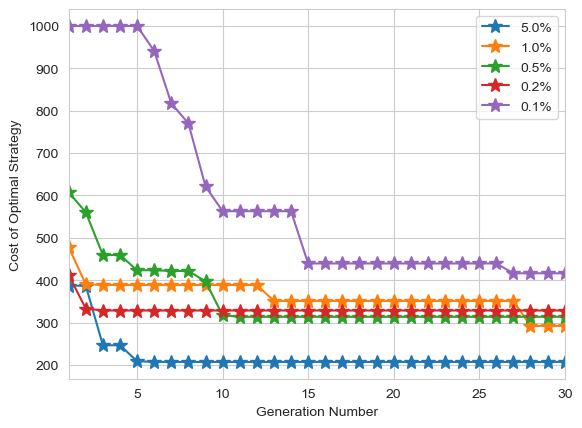

In [330]:
#实验1:
#给定不同的精度要求：8%， 5%， 1%， 0.5%， 0.1%
#遗传算法的遗传代数上限分别是
#找到最好的价格和价格配置
N = 30
mode = "best cost"
x = np.array(range(1, N+1))
ys = []
for value in [0.002, 0.001, 0.0005, 0.00025, 0.0001]:
    limit = value
    y = np.array(inheritance_optimum(data, num_simulations=N)[2])
    ys.append(y)
# print(x)
# print(ys)

# plt.plot(x, y1, 'r',marker='*', markersize=10)
# plt.plot(x, y2, 'b', marker='*',markersize=10)
# plt.title('温度对比折线图')  # 折线图标题
fig = plt.figure()
# fig.set_size_inches(8, 6)
# fig.set_dpi(600)
plt.xlabel('Generation Number')  # x轴标题
plt.ylabel('Cost of Optimal Strategy')  # y轴标题
# plt.ylim(0, 200)
plt.xlim(1, 30)
# plt.xticks(x, x)
#给图像添加注释，并设置样式
for y in ys:
    plt.plot(x, y, marker='*', markersize=10)
plt.legend(["0.002", "0.001", "0.0005", "0.00025", "0.0001"])
    # for a, b in zip(x, y):
    #     plt.text(x, b, b, ha='center', va='bottom', fontsize=10)
#绘制图例
# plt.legend(['第一天', '第二天'])
#显示图像
plt.show()

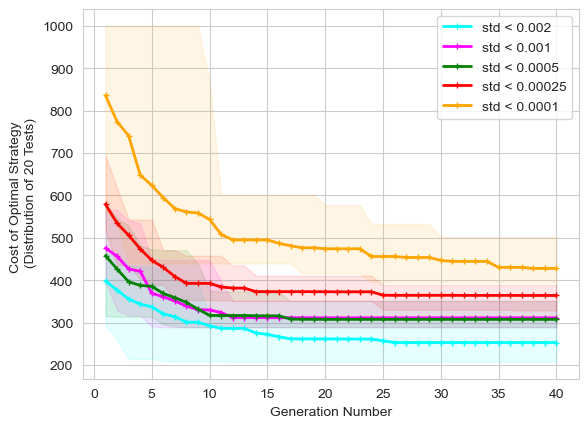

In [333]:
N = 40
mode = "best cost"
x = np.array(range(1, N+1))
yss = []
colors = ["cyan", "magenta", "green", "red", "orange"]
labels = ["0.002", "0.001", "0.0005", "0.00025", "0.0001"]
for value in [0.002, 0.001, 0.0005, 0.00025, 0.0001]:
# for value in [0.2]:
    limit = value
    ys = []
    for _ in range(10):
        y = np.array(inheritance_optimum(data, num_simulations=N)[2])
        ys.append(y)
    ys = np.array(ys)
    ys_max = np.max(ys, axis=0)
    ys_mean = np.mean(ys, axis=0)
    ys_min = np.min(ys, axis=0)
    yss.append([ys_max, ys_mean, ys_min])

fig = plt.figure()
# fig.set_size_inches(6, 3.5)
# fig.set_dpi(400)
plt.xlabel('Generation Number')  # x轴标题
plt.ylabel('Cost of Optimal Strategy \n (Distribution of 10 Tests)')  # y轴标题
# plt.ylim(0, 200)
# plt.xlim(1, N)
# plt.xticks(x, x)
#给图像添加注释，并设置样式
for i in range(5):
    plt.plot(x, yss[i][1], color = colors[i], marker='+', markersize=5, linewidth=2, label=("std < "+labels[i]))
    plt.fill_between(x, yss[i][0], yss[i][2], color=colors[i], alpha=0.1)
plt.legend()
# for a, b in zip(x, y):
#     plt.text(x, b, b, ha='center', va='bottom', fontsize=10)
#显示图像
plt.show()

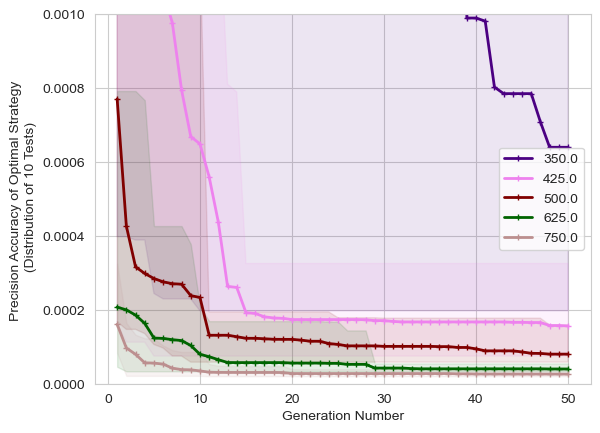

In [340]:
N = 50
mode = "best percent"
x = np.array(range(1, N+1))
yss = []
colors = ["indigo", "violet", "maroon", "darkgreen", "rosybrown"]
labels = ["350.0", "425.0", "500.0", "625.0", "750.0"]
for value in [350.0, 425.0, 500.0, 625.0, 750.0]:
    # for value in [0.2]:
    limit = value
    ys = []
    for _ in range(10):
        y = np.array(inheritance_optimum(data, num_simulations=N)[2])
        ys.append(y)
    ys = np.array(ys)
    ys_max = np.max(ys, axis=0)
    ys_mean = np.mean(ys, axis=0)
    ys_min = np.min(ys, axis=0)
    yss.append([ys_max, ys_mean, ys_min])

fig = plt.figure()
# fig.set_size_inches(6, 4)
# fig.set_dpi(400)
plt.xlabel('Generation Number')  # x轴标题
plt.ylabel('Precision Accuracy of Optimal Strategy \n (Distribution of 10 Tests)')  # y轴标题
plt.ylim(0, 0.001)
# plt.xlim(1, N)
# plt.xticks(x, x)
#给图像添加注释，并设置样式
for i in range(len(labels)):
    plt.plot(x, yss[i][1], color = colors[i], marker='+', markersize=5, linewidth=2, label=labels[i])
    plt.fill_between(x, yss[i][0], yss[i][2], color=colors[i], alpha=0.1)
plt.legend()
# for a, b in zip(x, y):
#     plt.text(x, b, b, ha='center', va='bottom', fontsize=10)
#显示图像
plt.show()

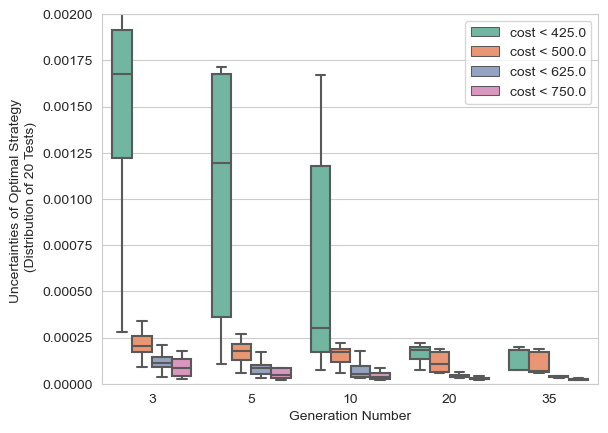

In [342]:
import seaborn as sns

N = 35
M = 20
mode = "best percent"
yss = []
labels = ["425.0", "500.0", "625.0", "750.0"]
orders = ["3", "5", "10", "20", "35"]
for value in [425.0, 500.0, 625.0, 750.0]:
    limit = value
    ys = []
    for _ in range(M):
        yall = np.array(inheritance_optimum(data, num_simulations=N)[2])
        y = []
        for ostr in orders:
            o = int(ostr)
            y.append(yall[o-1])
        y = np.array(y)
        ys.append(y)
    ys = np.array(ys)
    yss.append(ys)
yss = np.array(yss)
ylist = np.array([])
for j in range(5):
    yss_ = np.array([])
    for i in range(4):
        yss_ = np.concatenate((yss_, yss[:, :, j][i]), axis=0)
    ylist = np.concatenate((ylist, yss_), axis=0)

ylist = ylist.tolist()
x = []
for o in orders:
    for _ in range(4*M):
        x.append(o)
h = []
for _ in range(5):
    for l in labels:
        for __ in range(M):
            h.append("cost < "+l)
        # print(ys[:, 0])

#     yss.append([ys_max, ys_mean, ys_min])
sns.boxplot(
    x=x,
    y=ylist,
    # data=tips,
    order= orders,
    hue=h,
    showfliers=0,
    palette="Set2",
    # notch=True
)

# plt.gcf().set_size_inches(6, 3.5)
# plt.gcf().set_dpi(500)
plt.xlabel('Generation Number')  # x轴标题
plt.ylabel('Uncertainties of Optimal Strategy \n (Distribution of ' + str(M) + ' Tests)')  # y轴标题
plt.ylim(0, 0.002)
plt.legend()
plt.show()